# Introduction
This project is a tutorial project from DataQuest and can be accessed [here](https://www.dataquest.io/m/288/guided-project%3A-investigating-fandango-movie-ratings). <br>
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.<br>

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.<br>

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.<br>

In [17]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'fivethirtyeight' )

# Understanding the Data
There are two datas used in this project
- The data in one sample was collected previously from Hickey's analysis
- The other data in one sample collected more recently

In [3]:
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [7]:
previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [8]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [9]:
# extract data from fandango
fandango_pre = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [10]:
fandango_pre.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [11]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


The main objective of this project is to determine whether there has been any change in Fandanago's rating system after Hickey's analysis. The population of interest of our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year. <br>
As we want to find out whether the parameters of this population changed after Hickey's analysis, we are interested in sampling the popualtion at two differnet preiods in time - previous and after Hickey's analysis - so we can compare the two states. <br>
From Hickey's article and the `README.md` of his [repository](https://github.com/fivethirtyeight/data/tree/master/fandango), we can see he used the following sampling critiers:
- The movie must have had at least 30 fan ratings on Fandango's website at hte time of sampling (Aug,24,2015)
- The movie must have had tickets on sale in 2015

The sampling was clearly not random because not every movie had the same chance to be included in the sample - some movies did not have chance (e.g those have under 30 fan rantings or those without tickest on sale in 2015). It seems the sample are most likely not representative of the entire population. This is mainly due to *temporal trends*. <br>

The more recent sample follow the following criteria:
- The movie must have been released in 2016 or later
- The movie must have had a considerable number of votes and reviews 

The second sampe is also subject to temporal trends and most likely not representative of population interst. 

Both data follow *purposive sampling* or judgmental/selective sampling. Due to this flaw, we can either collect new data or change the goal of our analysis. 

# Changing Goal of Analysis
Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new objective is to determine whether there is any difference between Fandango's ratings for popular movies in 2015 and Dandango's ratings for popular movies in 2016. This new goal would be good proxy for our initial goal.

# Extract Samples 
With this new analysis goal, we have two populations of interest:
- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016
A popular movie is defined as a movie with at least 30 fan ratings on Fandango's webiste <br>
Despite the second sample claimed it use popular movies, there is no information provided. We should keep in mind that this sample might still not representative enough. <br>
One quick way to check is to sample randomly 10 movies from it and check the number of fan ratings by ourselves on Fandango's website.

In [12]:
fandango_after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Below is the fan rating obtained from Fandango's website (Apr,2018):
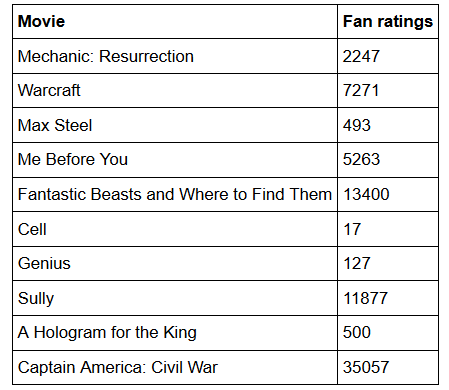
It appears most of the movies in the second sample are popular. <br>
We will also need to double check the first sampel data consist of only popular movies.

In [13]:
sum(fandango_pre['Fandango_votes']<30)

0

In [14]:
#extract movies released in year 2015
fandango_pre['Year'] = fandango_pre['FILM'].str[-5:-1]
fandango_pre.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [18]:
fandango_2015 = fandango_pre[fandango_pre['Year']=='2015'].copy()

In [16]:
#extract movies released in year 2016
fandango_2016 = fandango_after[fandango_after['year']==2016].copy()

# Compare Distribution Shapes for 2015 and 2016

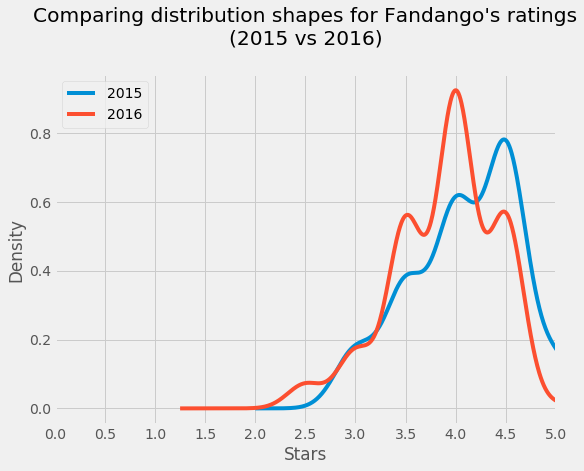

In [20]:
fandango_2015['Fandango_Stars'].plot.kde(label='2015',legend=True, figsize=(8,6))
fandango_2016['fandango'].plot.kde(label='2016',legend=True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(np.arange(0,5.1,.5))
plt.show()

From figure above, we can observe that:
- Both distribution are strongly skewed towards left
- The ratings in 2016 has distribution skewed slighly more towards left compared to ratings in 2015

The left skew showed that popular movies on Fandango are given mostly high and very high fan ratings. Since Fandango sells tickets, the high ratings are a bit skeptical. <br>
The ratings of 2016 shifted more towards left indicates that the ratings were slightly lower comapred to those in 2015. It suggest that there was a difference indeed between Fandango's ratings for popular movies in 2015 and 2016.

# Comparing Relative Frequencies

In [22]:
print ('2015 ratings'+'\n'+'_'*16 )
print(fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100)

print ('2016 ratings'+'\n'+'_'*16)
print(fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100)

2015 ratings
________________
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2016 ratings
________________
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In 2016, very high ratings (4.5 and 5 starts) had significantly lower percentages comapred to 2015. In addition, there is rating star of 2.5 stars in 2016. 

# Determining the Direction of Change
Use summary metrics to get a more precise picture about the direction of the change. 

In [27]:
summary = pd.DataFrame(
data={2015:[fandago_2015['Fandango_Stars'].mean(),
       fandago_2015['Fandango_Stars'].median(),
       fandago_2015['Fandango_Stars'].mode()[0]],
     2016:[fandango_2016['fandango'].mean(),
       fandango_2016['fandango'].median(),
       fandango_2016['fandango'].mode()[0]]},
    index=['mean','median','mode'])

In [28]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


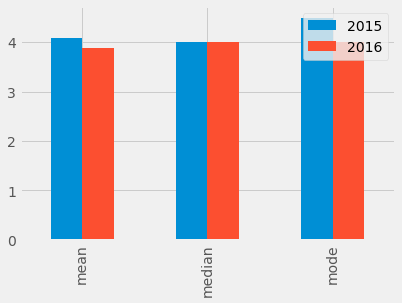

In [29]:
summary.plot.bar()

While the median is same for both years, the mean and mode dropped in 2016. 

# Conclusion
The analysis showed that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and those in 2016. We can also determine that the on average, popular movies released in 2016 were rated lower compared to movies released in 2015. <br>
However, we cannot determine what cause the change, thougth it might be that Fandango fixing the biased rating system after Hickey's analysis.